In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [4]:
df.shape

(11914, 16)

In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [16]:
print(df.count())
df.isnull().sum()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [34]:
print(df.dtypes)


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [31]:
# Fill missing values in numeric columns with the mean

numeric_cols = df.select_dtypes(include=['int64', 'float64'])
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

# Fill missing values in non-numeric columns with a placeholder
non_numeric_cols = df.select_dtypes(include=['object'])
for col in non_numeric_cols.columns:
    mode_value = df[col].mode()[0]  # Get the mode (most frequent value)
    df[col].fillna(mode_value, inplace=True)

print(df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


Text(0.5, 1.0, 'Model Distribution')

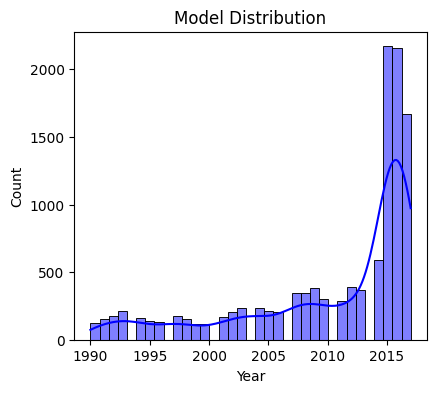

In [6]:
#Step 2 :Univariate Analysis : Numerical Data

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Year'],kde=True,color='blue')
plt.title('Model Distribution')
# plt.show()


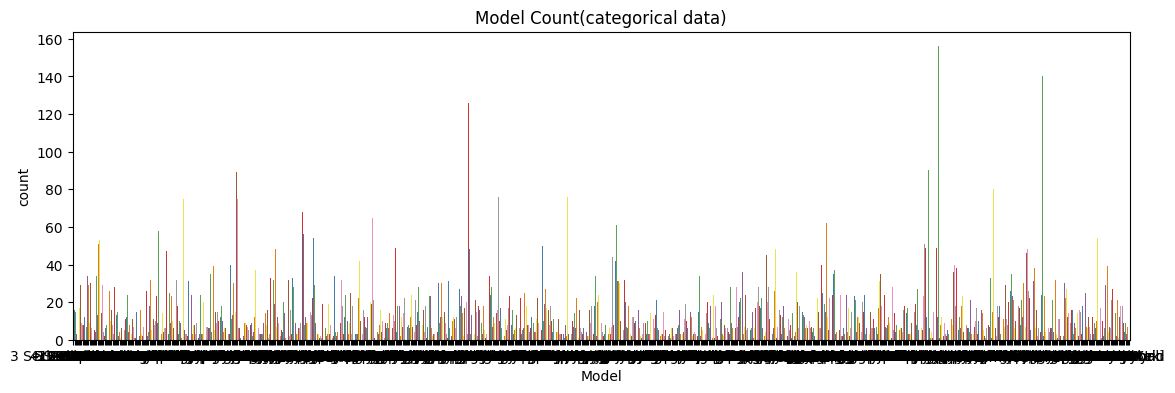

In [54]:
# Step 3:  Categorical Data
plt.figure(figsize=(30,4))
plt.subplot(1,2,1)
sns.countplot(x='Model',hue='Model',data=df,palette='Set1')
plt.title("Model Count(categorical data)")
plt.show()

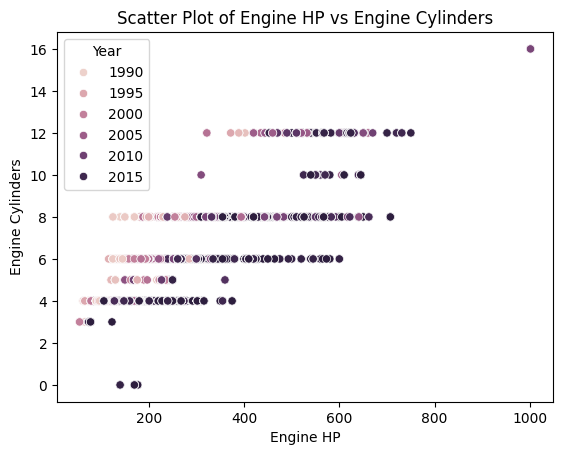

In [18]:
#Step 4 Bivariate Analysis-Numerical Data
sns.scatterplot(x='Engine HP',y='Engine Cylinders',hue='Year',data=df)
plt.title("Scatter Plot of Engine HP vs Engine Cylinders")
plt.show()

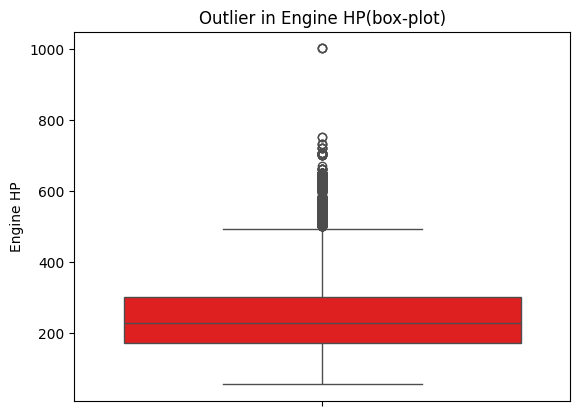

In [48]:
# Step 5: Oultier Detection
# plt.figure(figsize=(100,50))
sns.boxplot(df['Engine HP'],color='red')
plt.title("Outlier in Engine HP(box-plot)")
plt.ylabel('Engine HP')

plt.show()

Text(0, 0.5, 'Engine Cylinders')

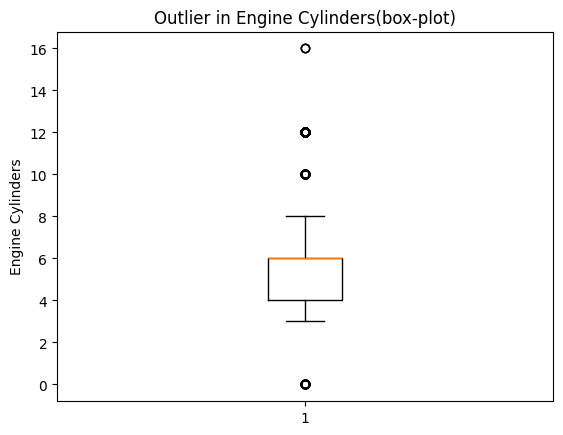

In [47]:
plt.boxplot(df['Engine Cylinders'])
plt.title("Outlier in Engine Cylinders(box-plot)")
plt.ylabel('Engine Cylinders')

Text(0, 0.5, 'MSRP')

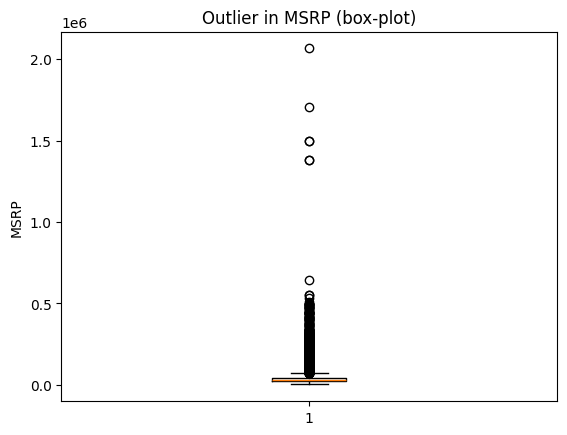

In [49]:
plt.boxplot(df['MSRP'])
plt.title("Outlier in MSRP (box-plot)")
plt.ylabel('MSRP')